In [1]:
import pandas as pd
%matplotlib inline

In [2]:
path = "Data/DataAmongKikiData.csv" 
#dataframe
answers = pd.read_csv(path)

In [3]:
type(answers)

pandas.core.frame.DataFrame

In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'What Era Would You Live In - Answers')

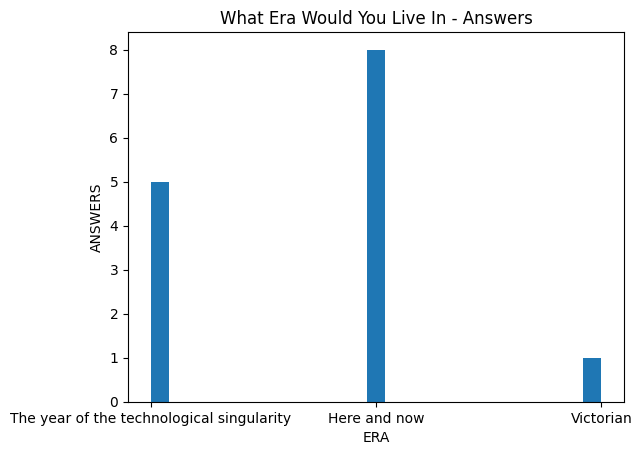

In [9]:
plt.hist(answers.era, bins=25)

plt.xlabel('ERA')
plt.ylabel('ANSWERS')
plt.title('What Era Would You Live In - Answers')

In [12]:
birthorders = answers.groupby('birthorder')

In [23]:
oldest_children = birthorders.get_group('Oldest')
middle_children = birthorders.get_group('Middle')
youngest_children = birthorders.get_group('Youngest')

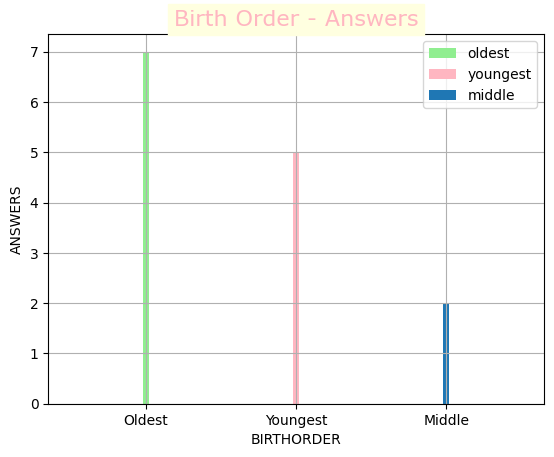

In [34]:
#changing the font and colours to make it purdy :)

font = {'family': 'Verdana',
        'color':  'lightpink',
        'weight': 'normal',
        'size': 16,
       }

plt.hist(oldest_children.birthorder, bins=25, color='lightgreen', label='oldest')
plt.hist(youngest_children.birthorder, bins=25, color='lightpink', label='youngest')
plt.hist(middle_children.birthorder, bins=25, label='middle')

plt.legend()

plt.xlabel('BIRTHORDER')
plt.ylabel('ANSWERS')
plt.title('Birth Order - Answers', fontdict=font, backgroundcolor='lightyellow')

plt.grid(True) #adding gridlines to imporve readability


#more older childs
